#### AUDIO AND SOUND

**Sound signal** is produced by variations in air pressure, where it can be measured by the intensity of the pressure variations over times. Sound signals often repeat at regular intervals so that each wave has the same shape. The heigh shows the intensity of the sound and is knownd as **the amplitude**. The time taken for the signal to complete one full wave is **the period**. The number of waves made by the singal in one second is called **the frequency**.  

To **represend sound digitally** we must turn the signal into a series of numbers so that we can input it into our models. This can be done by **measureing the amplitude of the sound at fixed intervals of time**. Each measurement is called a sample, and the sample rate is the number of samples per second. IE: 44.100 samples per seconds. 

Signal of different frequencies can be added together to create composite signals which can be called as **spectrum. It plots all the frequencies that are present in the signal along with the strenght or amplitude of each frequency**. The lowest frequency is called fundamental frequency. While harmonics is a multiplication of fundamental frequency.  



*Source: https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504*


#### IMPORT PYTHON LIBRARIES

In [8]:
import numpy as np 
import librosa as librosa
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import librosa.display
import pandas as pd 
import os 
from sklearn.model_selection import train_test_split
import splitfolders 
import skimage.io

#### LOAD SAMPLE AUDIO FILE

In [16]:
y, sr = librosa.load("G:/My Drive/Work Data/PT. Hutomo Bangun Perkasa/Hydroinformatics/Thesis Research/Audio Sample/h01 (1).wav", sr=32000)

#### DISPLAY THE AUDIO FILE IN TIME DOMAIN

The sample audio is displayed as a numpy array (time series) and has (150842,) number of samples
The 10 randomly picked consequtive samples of the audio are: [-2.6851608e-03 -3.6718054e-03 -4.0539969e-03 -3.2744098e-03
 -1.7284417e-03 -5.2673742e-04 -1.8879087e-05  1.7206337e-04
  3.6518669e-04 -1.0214845e-03]


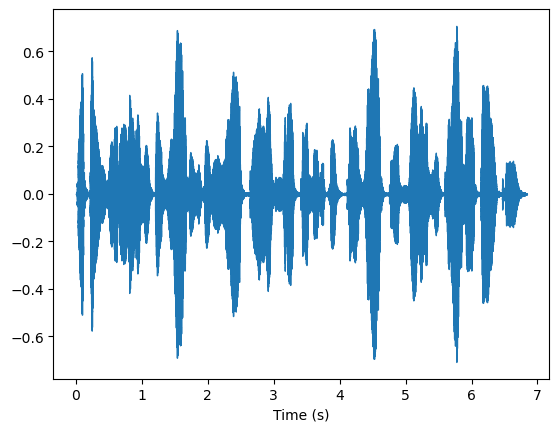

In [17]:
librosa.display.waveshow(y, max_points=11025, x_axis='s')
print("The sample audio is displayed as a numpy array (time series) and has", y.shape, "number of samples")
print("The 10 randomly picked consequtive samples of the audio are:", y[3000:3010])

### HEAR THE AUDIO